# Сборный проект:

# Исследование рынка компьютерных игр.

In [285]:
import pandas as pd
data = pd.read_csv('/datasets/games.csv')
rating = pd.read_csv('/datasets/rating.csv')

In [286]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [287]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [288]:
# приведем названия столбцов к нижнему регистру
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Добавим общее количество продаж игр во всех регионах в отдельный столбец.

In [289]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [290]:
# Проверим данные на дубликаты.
data.duplicated().sum()

0

In [291]:
# Посмотрим на пропущенные значения
isna_data = (data.isna().sum() / len(data)*100).reset_index()
isna_data.columns = ['index', 'isna']
isna_data = isna_data.sort_values(by='isna', ascending=False)
isna_data.query('isna > 0')

,index,isna
8,critic_score,51.319174
10,rating,40.478612
9,user_score,40.089740
2,year_of_release,1.609333
0,name,0.011965
3,genre,0.011965


Есть пропущенные значения в оценках критиков и игроков, есть игры в которых не указан рейтинг, год релиза, жанр и название.

In [292]:
data[data['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,2.39
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03


В строках, где пропущены название игры и жанр, пропущено много информации и это 0,01% от наших данных. Их лучше просто удалить.

In [293]:
# удалим строки с пропущенными значениями в столбце 'name'
data = data.dropna(subset=['name'])

In [294]:
print(data['year_of_release'].isna().sum())
data[data['year_of_release'].isnull()].sample(5)

269


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1131,Call of Duty: Black Ops,PC,NaN,Shooter,0.58,0.81,0.00,0.23,81.0,5.2,M,1.62
12734,Mobile Ops: The One Year War,X360,NaN,Simulation,0.00,0.00,0.06,0.00,NaN,NaN,NaN,0.06
15267,Saint,Wii,NaN,Shooter,0.02,0.00,0.00,0.00,NaN,tbd,E10+,0.02
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+,0.48
11377,Face Racers: Photo Finish,3DS,NaN,Racing,0.08,0.00,0.00,0.01,NaN,tbd,E,0.09


Год выпуска игры не указан в 269 строках.  
Все эти игры, как подсказывает google выходили в разные годы.  
Заполнять эти значения вручную долго и это 1,6% наших данных.  
Эти строки также удалим.

In [295]:
data = data.dropna(subset=['year_of_release'])

In [296]:
# Приведем год к цельночисленному значению.
data['year_of_release'] = data['year_of_release'].astype('int')

Посмотрим, релизы каких годов есть в наших данных.

In [297]:
data['year_of_release'].value_counts().reset_index().sort_values(by='index')

,index,year_of_release
36,1980,9
24,1981,46
27,1982,36
29,1983,17
34,1984,14
35,1985,14
28,1986,21
31,1987,16
33,1988,15
30,1989,17


Выше мы заметили, что оценка пользователей `user_score` не в числовом формате, а в формате object. Разберемся, в чем дело.

In [300]:
data['user_score'].value_counts().reset_index().sort_values(by='index').tail()

,index,user_score
67,9.4,11
76,9.5,5
91,9.6,2
94,9.7,1
0,tbd,2376


Как подсказывает Google аббревиатура tbd (to be determined) означает - "будет определено". То есть по сути рейтинг еще не определен.  
Приведем все значения столбца с оценками пользователей к числовому типу, и для обработки некорректных значений зададим параметр `errors='coerce'`, который вместо tbd вернет нам Nan'ы.

In [301]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

Много значений пропущено в рейтингах.

In [302]:
data[data['rating'].isnull()].sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15678,"Moshi, Kono Sekai ni Kami-sama ga Iru to suru ...",PSV,2016,Adventure,0.0,0.0,0.02,0.00,NaN,NaN,NaN,0.02
13140,Kinnikuman Muscle Grand Prix Max,PS2,2006,Fighting,0.0,0.0,0.05,0.00,NaN,NaN,NaN,0.05
10910,World Stadium 5,PS,2001,Sports,0.0,0.0,0.09,0.01,NaN,NaN,NaN,0.10
4140,Super Puyo Puyo 2,SNES,1995,Puzzle,0.0,0.0,0.47,0.00,NaN,NaN,NaN,0.47
14417,PriPara & Pretty Rhythm: PriPara de Tsukaeru O...,3DS,2015,Action,0.0,0.0,0.03,0.00,NaN,NaN,NaN,0.03


Пропущенные значения тут ничем заменять не будем.

Сколько всего игр в наших данных?

In [303]:
print(len(data['name'].value_counts()))
data['name'].value_counts().head()

11426


Need for Speed: Most Wanted     12
LEGO Marvel Super Heroes         9
FIFA 14                          9
Ratatouille                      9
Lego Batman 3: Beyond Gotham     8
Name: name, dtype: int64

Всего 11 426 уникальных названий. При этом некоторые игры занимают несколько строчек. Посмотрим на них.

In [304]:
data[data['name']=='Need for Speed: Most Wanted']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
253,Need for Speed: Most Wanted,PS2,2005,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T,4.37
523,Need for Speed: Most Wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN,2.81
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T,1.56
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T,1.25
1998,Need for Speed: Most Wanted,XB,2005,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T,1.04
2048,Need for Speed: Most Wanted,PSV,2012,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN,1.01
3581,Need for Speed: Most Wanted,GC,2005,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T,0.56
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T,0.29
6273,Need for Speed: Most Wanted,WiiU,2013,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN,0.27
6410,Need for Speed: Most Wanted,DS,2005,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E,0.27


In [305]:
data[data['name']=='FIFA 14']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
126,FIFA 14,PS3,2013,Sports,0.78,4.24,0.07,1.37,86.0,4.3,E,6.46
271,FIFA 14,X360,2013,Sports,0.92,2.89,0.01,0.40,84.0,4.2,E,4.22
469,FIFA 14,PS4,2013,Sports,0.61,1.85,0.11,0.44,87.0,6.3,E,3.01
1753,FIFA 14,XOne,2013,Sports,0.41,0.66,0.00,0.09,88.0,5.8,E,1.16
4699,FIFA 14,PSV,2013,Sports,0.08,0.23,0.01,0.09,NaN,1.8,E,0.41
4809,FIFA 14,PC,2013,Sports,0.01,0.36,0.00,0.03,87.0,4.6,E,0.40
4985,FIFA 14,Wii,2013,Sports,0.00,0.36,0.00,0.02,NaN,4.3,E,0.38
6871,FIFA 14,3DS,2013,Sports,0.00,0.22,0.00,0.01,NaN,NaN,NaN,0.23
7875,FIFA 14,PSP,2013,Sports,0.00,0.15,0.00,0.04,NaN,3.4,E,0.19


In [306]:
data[data['name']=='LEGO Marvel Super Heroes']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
730,LEGO Marvel Super Heroes,X360,2013,Action,1.24,0.79,0.00,0.19,80.0,7.6,E10+,2.22
945,LEGO Marvel Super Heroes,PS3,2013,Action,0.77,0.76,0.01,0.29,82.0,7.9,E10+,1.83
1139,LEGO Marvel Super Heroes,PS4,2013,Action,0.59,0.76,0.01,0.26,83.0,7.7,E10+,1.62
1959,LEGO Marvel Super Heroes,XOne,2013,Action,0.61,0.35,0.00,0.09,NaN,6.8,E10+,1.05
2313,LEGO Marvel Super Heroes,3DS,2013,Action,0.42,0.36,0.04,0.07,61.0,5.2,E10+,0.89
2778,LEGO Marvel Super Heroes,WiiU,2013,Action,0.31,0.35,0.02,0.06,82.0,8.0,E10+,0.74
3876,LEGO Marvel Super Heroes,PSV,2013,Action,0.11,0.29,0.00,0.11,NaN,NaN,NaN,0.51
5054,LEGO Marvel Super Heroes,DS,2013,Action,0.22,0.13,0.00,0.03,NaN,4.8,E10+,0.38
8369,LEGO Marvel Super Heroes,PC,2013,Action,0.04,0.12,0.00,0.01,78.0,8.1,E10+,0.17


In [307]:
data[data['name']=='Ratatouille']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1598,Ratatouille,DS,2007,Action,0.49,0.62,0.0,0.14,NaN,NaN,NaN,1.25
2442,Ratatouille,PS2,2007,Action,0.31,0.00,0.0,0.53,65.0,8.0,E,0.84
3069,Ratatouille,PSP,2007,Action,0.22,0.27,0.0,0.16,64.0,7.1,E,0.65
3902,Ratatouille,PS3,2007,Action,0.09,0.32,0.0,0.10,55.0,4.8,E,0.51
3948,Ratatouille,Wii,2007,Action,0.43,0.03,0.0,0.04,62.0,6.7,E,0.50
6398,Ratatouille,X360,2007,Action,0.23,0.02,0.0,0.02,56.0,NaN,E,0.27
7681,Ratatouille,GBA,2007,Action,0.14,0.05,0.0,0.00,65.0,NaN,E,0.19
9015,Ratatouille,GC,2007,Action,0.11,0.03,0.0,0.00,60.0,5.6,E,0.14
14514,Ratatouille,PC,2007,Action,0.01,0.01,0.0,0.00,NaN,7.9,E,0.02


Игра может выходить сразу на несколькоих платформах. Это может происходить не в один и тот же год.  
Например, Need for Speed: Most Wanted выходила в 2005, 2012 и 2013.  
Рейтинг игры в разных строчках может отличаться. Тот же Need for Speed: Most Wanted выходил с рейтингом E (для всех) и Т (Подросткам 13—19 лет).  
Оценки критиков и пользователей на разных платформах тоже разные.  
Не будем заменять эти пропущенные значения.

## Исследовательский анализ

<font style="color:DeepPink; font-size:200%">•</font> Построим распределение по годам релиза.

In [308]:
describe_year = data[['year_of_release']].describe()

In [309]:
def upper_mustache(data, column):
    Q1 = data[column]['25%']
    Q3 = data[column]['75%']
    IQR = Q3 - Q1
    upper_mustache = Q3 + 1.5 * IQR
    if upper_mustache > data[column]['max']:
        upper_mustache = data[column]['max']
    return upper_mustache

def lower_mustache(data, column):
    Q1 = data[column]['25%']
    Q3 = data[column]['75%']
    IQR = Q3 - Q1
    lower_mustache = Q1 - 1.5 * IQR
    if lower_mustache < data[column]['min']:
        lower_mustache = data[column]['min']
    return lower_mustache

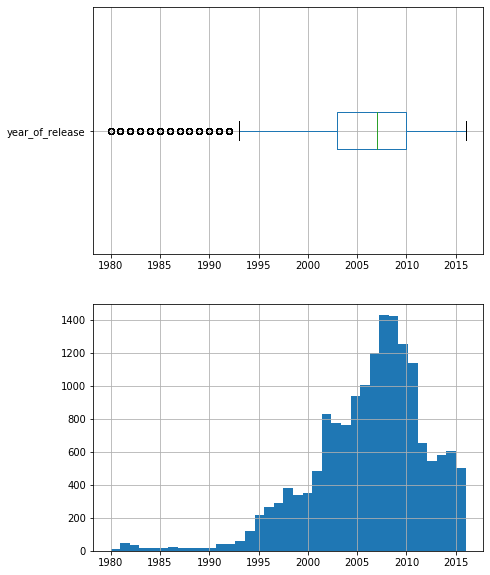

In [310]:
import matplotlib.pyplot as plt 
plt.subplots(figsize = (7, 10))
plot = (data['year_of_release'].hist(bins=37, ax = plt.subplot(2, 1, 2)))
plot = (data[['year_of_release']].boxplot(vert=False, ax = plt.subplot(2, 1, 1)))

In [311]:
print('Больше всего игр выпущено в {:.0f} году.'.format(describe_year['year_of_release']['mean']))
print('Основное количество игр выходило с {:.0f} по {:.0f} годы.'
      .format(lower_mustache(describe_year, 'year_of_release'), upper_mustache(describe_year, 'year_of_release')))

Больше всего игр выпущено в 2006 году.
Основное количество игр выходило с 1992 по 2016 годы.


<font style="color:DeepPink; font-size:200%">•</font> Построим распределение по годам релиза для игр с отзывом и без отзыва.

In [314]:
report = data.query('user_score == "NaN" & critic_score == "NaN"').copy()
report['score'] = 'без отзыва'
report_score = data.query('user_score != "NaN" | critic_score != "NaN"').copy()
report_score['score'] = 'с отзывом'
report = report.append(report_score)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


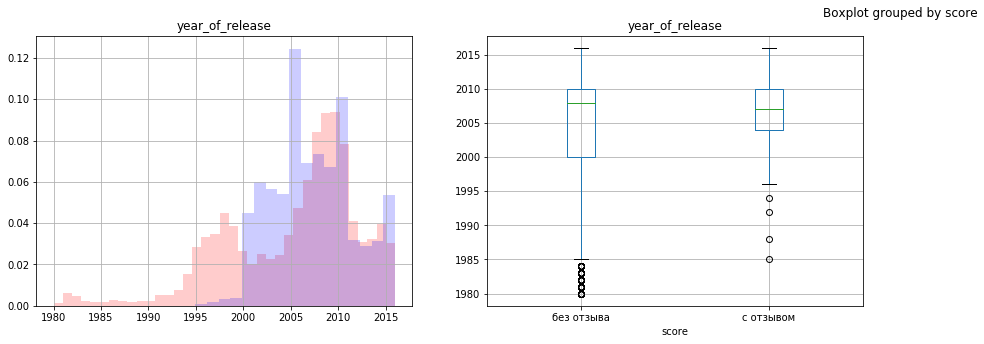

In [315]:
plt.subplots(figsize = (30, 5))
report.query('score == "без отзыва"').hist('year_of_release', bins=37, alpha = 0.2, ax = plt.subplot(141), \
                                           color = 'red', density = True)
report.query('score == "с отзывом"').hist('year_of_release', bins=25, alpha = 0.2, ax = plt.subplot(141), \
                                          color = 'blue', density = True)
report.boxplot('year_of_release', by='score', ax = plt.subplot(142))

Первая русско-язычная доска объявлений в интернете была открыта в 1995 году, в этом же году интернет становится коммерческим и отзывы об играх начали появляться тогда же.  
15 лет до этого, с 1980 года, игр выпускали гораздо меньше. А в 1995 году мы видим скачок вверх.  
В 2000 году резкий скачок вверх по количеству отзывов.

<font style="color:DeepPink; font-size:200%">•</font> Построим график продаж по каждому году.

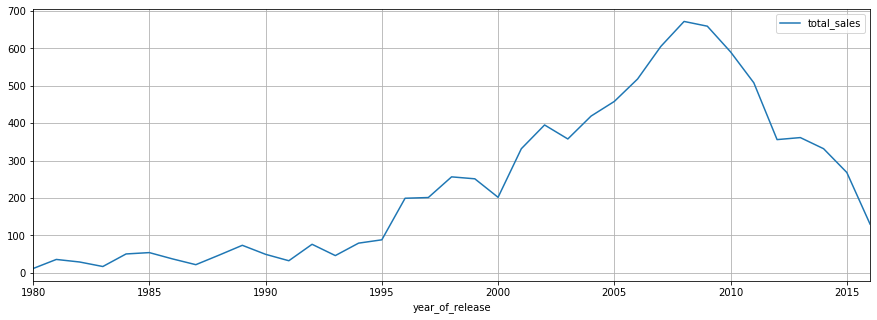

In [316]:
data_years = data.pivot_table(index=['year_of_release'], values='total_sales', aggfunc='sum').reset_index()
data_years.plot(kind='line', x='year_of_release', y='total_sales', figsize=(15, 5), grid=True)

Начиная с 1980 года продажи игр медленно ползут вверх.  С небольшими спадами в 2000 и 2003 годах.
В 2008 году пик продаж - 671,5 млн.долл.  
После него продажи начали падать. И в 2016 году составили уже всего 129,94 млн.долл.

<font style="color:DeepPink; font-size:200%">•</font> Построим диаграмму размаха по глобальным продажам.

In [319]:
# Объединим данные по продажам игры на всех платформах в одну строку с помощью сводной
data_sales = data.pivot_table(index=['name'], values='total_sales', aggfunc='sum').reset_index()

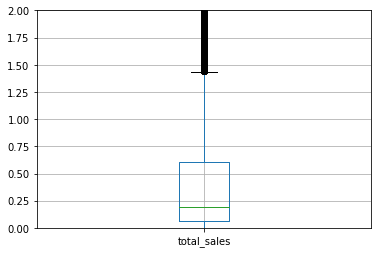

In [320]:
plt.ylim(0, 2)
data_sales[['total_sales']].boxplot()

In [321]:
describe_sales = data_sales[['total_sales']].describe()

In [322]:
print('Средняя прибыль за игру {:.2f} млн.долл.'.format(describe_sales['total_sales']['mean']))
print('Медиана прибыли за игру {:.2f} млн.долл.'.format(describe_sales['total_sales']['50%']))
print('В характерный разброс значений прибыли попадают суммы до {:.2f} млн.долл.'
      .format(upper_mustache(describe_sales, 'total_sales')))
print('Большое количество значений (выбросов) выше этой суммы. Максимальная прибыль за игру {:.2f} млн.долл.'\
      .format(describe_sales['total_sales']['max']))


Средняя прибыль за игру 0.77 млн.долл.
Медиана прибыли за игру 0.19 млн.долл.
В характерный разброс значений прибыли попадают суммы до 1.44 млн.долл.
Большое количество значений (выбросов) выше этой суммы. Максимальная прибыль за игру 82.54 млн.долл.


<font style="color:DeepPink; font-size:200%">•</font> Узнаем на какой платформе было выпущено больше всего игр.

In [323]:
data_platform = (data
                 .pivot_table(index=['platform'], values='name', aggfunc='count')
                 .reset_index()
                 .sort_values(by='name', ascending=False)
                )
data_platform.head(10)

,platform,name
16,PS2,2127
4,DS,2121
17,PS3,1306
26,Wii,1286
28,X360,1232
19,PSP,1193
15,PS,1190
13,PC,957
6,GBA,811
29,XB,803


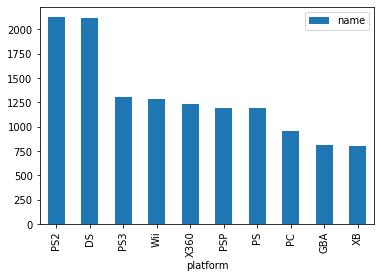

In [324]:
data_platform.head(10).plot(kind='bar', x='platform')

Первое место среди платформ занимает Play Station - 2, почти вровень с ним идет - Nintendo DS, следом Play Station - 3.  
Персональный компьютер по количеству выпущенных для него игр занимает 13 место.

<font style="color:DeepPink; font-size:200%">•</font> Какого жанра игры выпускают больше всего?

In [325]:
data_genre = (data
                 .pivot_table(index=['genre'], values='name', aggfunc='count')
                 .reset_index()
                 .sort_values(by='name', ascending=False)
                )
data_genre.head(10)

,genre,name
0,Action,3307
10,Sports,2306
3,Misc,1721
7,Role-Playing,1481
8,Shooter,1296
1,Adventure,1293
6,Racing,1226
4,Platform,878
9,Simulation,857
2,Fighting,837


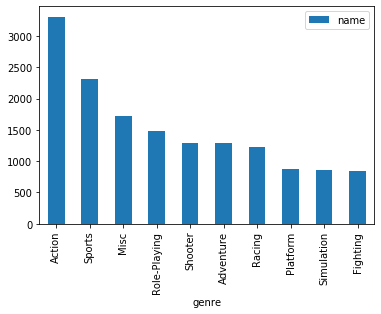

In [326]:
data_genre.head(10).plot(kind='bar', x='genre')

Самые популярные игры жанров: Action, Sports и Misc.

<font style="color:DeepPink; font-size:200%">•</font> Найдем игры с наибольшей и наименьшей оценкой от пользователей.

In [327]:
describe_user_score = data[['user_score']].describe()
max_user_score = describe_user_score["user_score"]["max"]
min_user_score = describe_user_score["user_score"]["min"]

In [328]:
data.query('user_score == @max_user_score | user_score == @min_user_score')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2835,My Little Pony: Pinkie Pie's Party,DS,2008,Adventure,0.66,0.00,0.0,0.06,NaN,0.0,E,0.72
14412,Breath of Fire III,PSP,2005,Role-Playing,0.00,0.02,0.0,0.01,NaN,9.7,T,0.03


Самую высокую оценку пользователей получила игра Breath of Fire III. А самую низкую My Little Pony: Pinkie Pie's Party.

<font style="color:DeepPink; font-size:200%">•</font> Найдем игры с наибольшей и наименьшей оценкой от критиков.

In [329]:
describe_critic_score = data[['critic_score']].describe()
max_critic_scoree = describe_critic_score["critic_score"]["max"]
min_critic_score = describe_critic_score["critic_score"]["min"]

In [330]:
data.query('critic_score == @max_critic_scoree | critic_score == @min_critic_score')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
51,Grand Theft Auto IV,X360,2008,Action,6.76,3.07,0.14,1.03,98.0,7.9,M,11.00
57,Grand Theft Auto IV,PS3,2008,Action,4.76,3.69,0.44,1.61,98.0,7.5,M,10.50
227,Tony Hawk's Pro Skater 2,PS,2000,Sports,3.05,1.41,0.02,0.20,98.0,7.7,T,4.68
5350,SoulCalibur,DC,1999,Fighting,0.00,0.00,0.34,0.00,98.0,8.8,T,0.34
13689,Ride to Hell,PS3,2013,Racing,0.02,0.01,0.00,0.01,13.0,1.0,M,0.04


Самую высокую оценку критиков получили игры: Grand Theft Auto IV, Tony Hawk's Pro Skater 2, SoulCalibur	. А самую низкую Ride to Hell.

Оценки критиков и пользователей не совпадают, посмотрим, есть ли между ними взаимосвязь.

<font style="color:DeepPink; font-size:200%">•</font> Оценим корреляцию между оценками критиков и пользовательскими оценками.

In [331]:
data['user_score'].corr(data['critic_score'])

0.5796706281932222

Линейная корреляция между оценками критиков и пользователей есть.

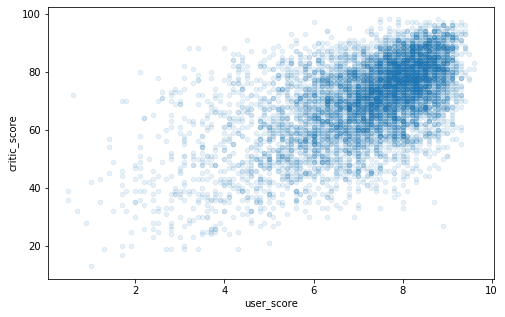

In [332]:
data.plot(x='user_score', y='critic_score', kind='scatter', alpha=0.1, figsize=(8, 5))


Больше единодушия в оценках игроков и критиков обнаруживаетмся в играх, которые и те и другие оценивают ~ 8 <font style="color:gray"><i>игроки</i></font> (80 <font style="color:gray"><i>критики</i></font>).  
Более широкий разброс значений в играх с низкими оценками. Например, игры, которые игроки оценивают на 2, критики оценивают и на 20 и на 80.

## Составим портрет пользователя для каждого региона

<font style="color:DeepSkyBlue; font-size:400%">•</font> Для пользователей каждого региона (Северная Америка, Европа и Япония) определим:

<font style="color:DeepSkyBlue; font-size:200%">•</font> топ-5 предпочтительных жанров

In [333]:
data_na_sales_genre = (data
                 .pivot_table(index=['genre'], values='na_sales', aggfunc='sum')
                 .reset_index()
                 .sort_values(by='na_sales', ascending=False)
                )
data_na_sales_genre_top5 = data_na_sales_genre.head(5)
data_na_sales_genre_top5

,genre,na_sales
0,Action,863.17
10,Sports,671.20
8,Shooter,584.83
4,Platform,444.44
3,Misc,399.57


In [334]:
data_eu_sales_genre = (data
                 .pivot_table(index=['genre'], values='eu_sales', aggfunc='sum')
                 .reset_index()
                 .sort_values(by='eu_sales', ascending=False)
                )
data_eu_sales_genre_top5 = data_eu_sales_genre.head(5)
data_eu_sales_genre_top5

,genre,eu_sales
0,Action,510.99
10,Sports,371.33
8,Shooter,314.52
6,Racing,234.49
3,Misc,210.60


In [335]:
data_jp_sales_genre = (data
                 .pivot_table(index=['genre'], values='jp_sales', aggfunc='sum')
                 .reset_index()
                 .sort_values(by='jp_sales', ascending=False)
                )
data_jp_sales_genre_top5 = data_jp_sales_genre.head(5)
data_jp_sales_genre_top5

,genre,jp_sales
7,Role-Playing,353.39
0,Action,160.14
10,Sports,134.93
4,Platform,130.71
3,Misc,107.02


In [336]:
data_sales_genre_top = pd.merge(left=data_na_sales_genre_top5, right=data_eu_sales_genre_top5, how='outer', \
                                  left_on='genre', right_on='genre')
data_sales_genre_top = pd.merge(left=data_sales_genre_top, right=data_jp_sales_genre_top5, how='outer', \
                                  left_on='genre', right_on='genre')
data_sales_genre_top = data_sales_genre_top.fillna(0)
data_sales_genre_top['total'] = data_sales_genre_top['na_sales'] + data_sales_genre_top['eu_sales'] + \
data_sales_genre_top['jp_sales']
data_sales_genre_top = data_sales_genre_top.sort_values(by='total', ascending=False)
data_sales_genre_top.drop('total', axis=1, inplace=True)

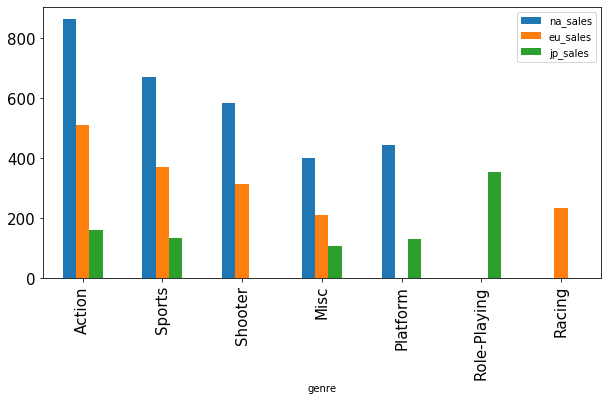

In [337]:
data_sales_genre_top.plot.bar(x='genre', figsize=(10, 5), fontsize=15)

В топ-5 жанров Северной Америки входят: Action, Sports, Shooter, Platform и Misc.  
Европы: Action, Sports, Shooter, Racing и Misc.  
Японии: Role-Playing, Action, Sports, Platform и Misc.

<font style="color:DeepSkyBlue; font-size:200%">•</font> в какие года пользователи были наиболее активны (больше всего покупали игры)

In [338]:
data_na_sales_years = (data
                 .pivot_table(index=['year_of_release'], values='na_sales', aggfunc='sum')
                 .reset_index()
                 .sort_values(by='na_sales', ascending=False)
                )
data_na_sales_years_top10 = data_na_sales_years.head(10)

In [339]:
data_eu_sales_years = (data
                 .pivot_table(index=['year_of_release'], values='eu_sales', aggfunc='sum')
                 .reset_index()
                 .sort_values(by='eu_sales', ascending=False)
                )
data_eu_sales_years_top10 = data_eu_sales_years.head(10)

In [340]:
data_jp_sales_years = (data
                 .pivot_table(index=['year_of_release'], values='jp_sales', aggfunc='sum')
                 .reset_index()
                 .sort_values(by='jp_sales', ascending=False)
                )
data_jp_sales_years_top10 = data_jp_sales_years.head(10)

In [341]:
data_sales_years_top = pd.merge(left=data_na_sales_years_top10, right=data_eu_sales_years_top10, how='outer', \
                                  left_on='year_of_release', right_on='year_of_release')
data_sales_years_top = pd.merge(left=data_sales_years_top, right=data_jp_sales_years_top10, how='outer', \
                                  left_on='year_of_release', right_on='year_of_release')
data_sales_years_top = data_sales_years_top.sort_values(by='year_of_release')

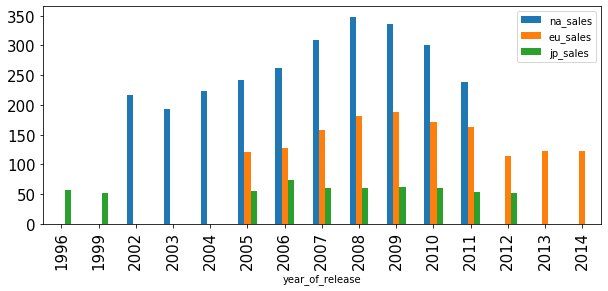

In [342]:
data_sales_years_top.plot(kind='bar', x='year_of_release', figsize=(10, 4), fontsize=15)

Больше всего игр в Северной Америке покупали с 2002 по 2011 годы, в Европе с 2005 по 2014, в Японии в 96-м и 99-м годах и с 2005 по 2012.  
В среднем продажи в Японии на порядок меньше, чем в Европе, а в Европе меньше, чем в Северной Америке.

<font style="color:DeepSkyBlue; font-size:200%">•</font> топ-5 предпочтительных платформ

In [343]:
data_na_sales_platform = (data
                 .pivot_table(index=['platform'], values='na_sales', aggfunc='sum')
                 .reset_index()
                 .sort_values(by='na_sales', ascending=False)
                )
data_na_sales_platform_top5 = data_na_sales_platform.head(5)

In [344]:
data_eu_sales_platform = (data
                 .pivot_table(index=['platform'], values='eu_sales', aggfunc='sum')
                 .reset_index()
                 .sort_values(by='eu_sales', ascending=False)
                )
data_eu_sales_platform_top5 = data_eu_sales_platform.head(5)

In [345]:
data_jp_sales_platform = (data
                 .pivot_table(index=['platform'], values='jp_sales', aggfunc='sum')
                 .reset_index()
                 .sort_values(by='jp_sales', ascending=False)
                )
data_jp_sales_platform_top5 = data_jp_sales_platform.head(5)

In [346]:
data_sales_platform_top = pd.merge(left=data_na_sales_platform_top5, right=data_eu_sales_platform_top5, how='outer', \
                                  left_on='platform', right_on='platform')
data_sales_platform_top = pd.merge(left=data_sales_platform_top, right=data_jp_sales_platform_top5, how='outer', \
                                  left_on='platform', right_on='platform')

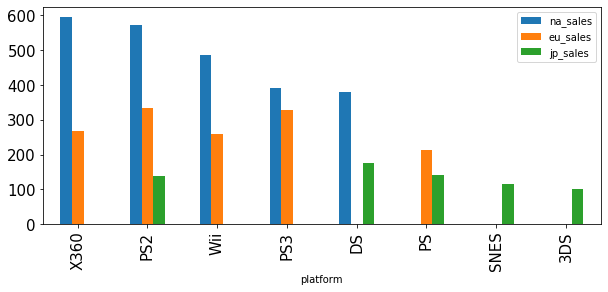

In [347]:
data_sales_platform_top.plot(kind='bar', x='platform', figsize=(10, 4), fontsize=15)

In [348]:
print('Самые популярные платформы в Северной Америке:: {}'.format(data_na_sales_platform_top5['platform'].unique()))
print('В Европе: {}'.format(data_eu_sales_platform_top5['platform'].unique()))
print('В Японии: {}'.format(data_jp_sales_platform_top5['platform'].unique()))

Самые популярные платформы в Северной Америке:: ['X360' 'PS2' 'Wii' 'PS3' 'DS']
В Европе: ['PS2' 'PS3' 'X360' 'Wii' 'PS']
В Японии: ['DS' 'PS' 'PS2' 'SNES' '3DS']


<font style="color:DeepSkyBlue; font-size:200%">•</font> какой рейтинг ESRB встречается чаще всего (наиболее частотная категория)

In [349]:
data_na_sales_rating = (data
                 .pivot_table(index=['rating'], values='na_sales', aggfunc='sum')
                 .reset_index()
                 .sort_values(by='na_sales', ascending=False)
                )
data_na_sales_rating.columns = ['rating', 'na']
data_na_sales_rating

,rating,na
1,E,1274.24
7,T,747.60
5,M,742.89
2,E10+,345.50
4,K-A,2.56
3,EC,1.53
0,AO,1.26
6,RP,0.00


In [350]:
data_eu_sales_rating = (data
                 .pivot_table(index=['rating'], values='eu_sales', aggfunc='sum')
                 .reset_index()
                 .sort_values(by='eu_sales', ascending=False)
                )
data_eu_sales_rating.columns = ['rating', 'eu']
data_eu_sales_rating

,rating,eu
1,E,703.87
5,M,480.00
7,T,421.79
2,E10+,183.35
0,AO,0.61
4,K-A,0.27
3,EC,0.11
6,RP,0.03


In [351]:
data_jp_sales_rating = (data
                 .pivot_table(index=['rating'], values='jp_sales', aggfunc='sum')
                 .reset_index()
                 .sort_values(by='jp_sales', ascending=False)
                )
data_jp_sales_rating.columns = ['rating', 'ru']
data_jp_sales_rating

,rating,ru
1,E,197.96
7,T,150.70
5,M,63.58
2,E10+,40.20
4,K-A,1.46
0,AO,0.00
3,EC,0.00
6,RP,0.00


In [352]:
data_sales_rating = pd.merge(left=data_na_sales_rating, right=data_eu_sales_rating, how='outer', \
                                  left_on='rating', right_on='rating')
data_sales_rating = pd.merge(left=data_sales_rating, right=data_jp_sales_rating, how='outer', \
                                  left_on='rating', right_on='rating')
data_sales_rating = data_sales_rating.fillna(0)
data_sales_rating['total'] = data_sales_rating['na'] + data_sales_rating['eu'] + data_sales_rating['ru']
data_sales_rating = data_sales_rating.sort_values(by='total', ascending=False)
data_sales_rating.drop('total', axis=1, inplace=True)

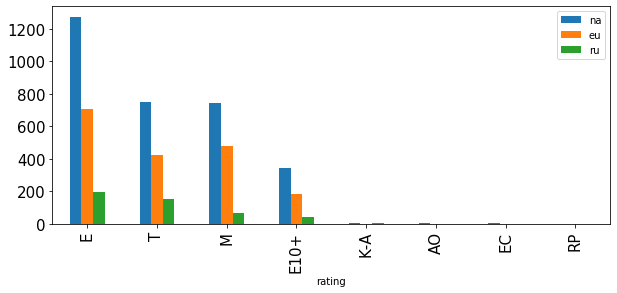

In [353]:
data_sales_rating.plot(kind='bar', x='rating', figsize=(10, 4), fontsize=15)

Чаще всего во всех регионах покупают игры в категории "для всех".

## Проверим гипотезы

<font style="color:MediumVioletRed; font-size:200%">•</font> средний пользовательский рейтинг платформ PS2 и PS3 одинаковый

In [354]:
import numpy as np
data_ps2 = data.query('platform == "PS2" & user_score >= 0')
data_ps3 = data.query('platform == "PS3" & user_score >= 0')
print('Дисперсия пользовательского рейтинга на платформе PS2: {}'.format(np.var(data_ps2['user_score'])))
print('Дисперсия пользовательского рейтинга на платформе PS2: {}'.format(np.var(data_ps3['user_score'])))

Дисперсия пользовательского рейтинга на платформе PS2: 1.7121207941413596
Дисперсия пользовательского рейтинга на платформе PS2: 2.138759808504008


Формулируем нулевую и альтернативную гипотезы.  
Но - средний пользовательский рейтинг платформ PS2 и PS3 одинаковый  
На - средний пользовательский рейтинг платформ PS2 и PS3 различается  

In [355]:
from scipy import stats as st
ps2_user_score = data_ps2['user_score']
ps3_user_score = data_ps3['user_score']
alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(
    ps2_user_score, 
    ps3_user_score,
    )
 
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.326216083163738e-47
Отвергаем нулевую гипотезу


Cредний пользовательский рейтинг платформ PS2 и PS3 различается.

<font style="color:MediumVioletRed; font-size:200%">•</font> средний пользовательский рейтинг жанров Action и Sports различается

In [356]:
data_action = data.query('genre == "Action" & user_score >= 0')
data_sports = data.query('genre == "Sports" & user_score >= 0')
print('Дисперсия пользовательского рейтинга на платформе Action: {}'.format(np.var(data_action['user_score'])))
print('Дисперсия пользовательского рейтинга на платформе Sports: {}'.format(np.var(data_sports['user_score'])))

Дисперсия пользовательского рейтинга на платформе Action: 2.0263648741821716
Дисперсия пользовательского рейтинга на платформе Sports: 2.6206293039045456


Формулируем нулевую и альтернативную гипотезы.  
Но - средний пользовательский рейтинг жанров Action и Sports одинаковый  
На - средний пользовательский рейтинг жанров Action и Sports различается  

In [357]:
action_user_score = data_action['user_score']
sports_user_score = data_sports['user_score']
alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(
    action_user_score, 
    sports_user_score,
    equal_var = False
    )
 
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.07370217419278534
Не получилось отвергнуть нулевую гипотезу


Предполагаем, что средний пользовательский рейтинг жанров Action и Sports одинаковый.

## Общий вывод

Самый популярный совокупно для всех регионов жанр - Action. Для выхода на рынок Северной Америки и Европы это самый популярный вариант. Если создавать игру для локального японского рынка, лучше выбрать жанр Role-Playing.

Самые популярные платформы: PS2, DS и PS3.  
Игру лучше создавать для платформы PS2, так как она входит в топ-5 популярных платформ по всем трем регионам.